### Importando Bibliotecas

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

### Importando Arquivo

In [60]:
covid_mundial = pd.read_csv('covid19_mundial.csv', sep=',', encoding='utf-8')

### Exploração dos Dados

In [61]:
covid_mundial.head()

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0


In [62]:
covid_mundial.shape

(39433, 8)

In [63]:
covid_mundial.drop(covid_mundial.columns[[1,3]], axis=1, inplace= True)

In [64]:
covid_mundial.head()

,date,country,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-02-24,Afghanistan,5,5,0,0
1,2020-02-25,Afghanistan,0,5,0,0
2,2020-02-26,Afghanistan,0,5,0,0
3,2020-02-27,Afghanistan,0,5,0,0
4,2020-02-28,Afghanistan,0,5,0,0


In [65]:
covid_mundial.dtypes

date                 object
country              object
new_cases             int64
cumulative_cases      int64
new_deaths            int64
cumulative_deaths     int64
dtype: object

In [66]:
covid_mundial['date'] = pd.to_datetime(covid_mundial['date'], errors = 'coerce')

In [67]:
covid_mundial.dtypes

date                 datetime64[ns]
country                      object
new_cases                     int64
cumulative_cases              int64
new_deaths                    int64
cumulative_deaths             int64
dtype: object

In [68]:
covid_brasil = covid_mundial.loc[covid_mundial['country'] == 'Brazil']

In [69]:
covid_brasil.head()

,date,country,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4896,2020-02-26,Brazil,5,5,0,0
4897,2020-02-27,Brazil,0,5,0,0
4898,2020-02-28,Brazil,0,5,0,0
4899,2020-02-29,Brazil,0,5,0,0
4900,2020-03-01,Brazil,1,6,0,0


In [70]:
covid_brasil.shape

(192, 6)

In [71]:
covid_brasil.isnull().sum()

date                 0
country              0
new_cases            0
cumulative_cases     0
new_deaths           0
cumulative_deaths    0
dtype: int64

In [72]:
covid_brasil.describe()

,date,new_cases,cumulative_cases,new_deaths,cumulative_deaths
count,192,192.000000,1.920000e+02,192.000000,192.000000
mean,2020-05-31 12:00:00,20822.213542,1.097211e+06,644.687500,41098.796875
min,2020-02-26 00:00:00,0.000000,5.000000e+00,0.000000,0.000000
25%,2020-04-13 18:00:00,1819.250000,2.180850e+04,114.750000,1198.250000
50%,2020-05-31 12:00:00,17259.000000,4.818030e+05,631.500000,28356.000000
75%,2020-07-18 06:00:00,38775.500000,2.020695e+06,1112.750000,76978.750000
max,2020-09-04 00:00:00,69074.000000,3.997865e+06,1595.000000,123780.000000
std,NaN,19158.201448,1.268914e+06,482.608603,41370.781794


In [73]:
covid_brasil.new_deaths.mode()

0    0
Name: new_deaths, dtype: int64

### Normalidade

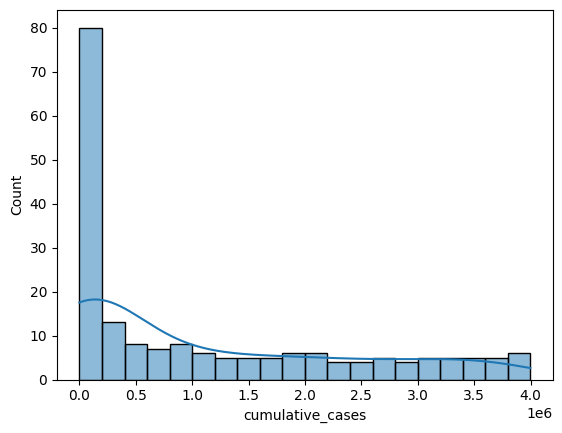

In [74]:
sns.histplot(covid_brasil, x='cumulative_cases', bins=20, kde=True, stat='count');

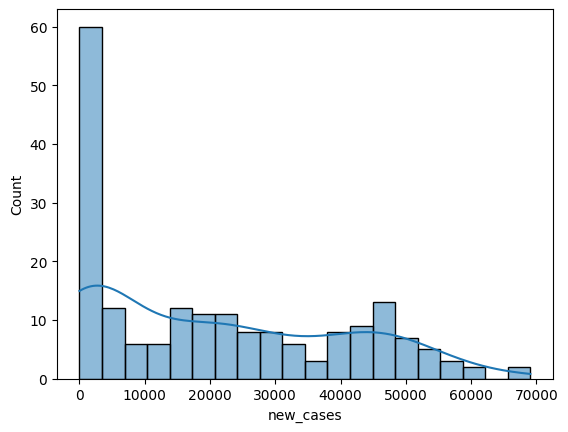

In [75]:
sns.histplot(covid_brasil, x='new_cases', bins=20, kde=True, stat='count');

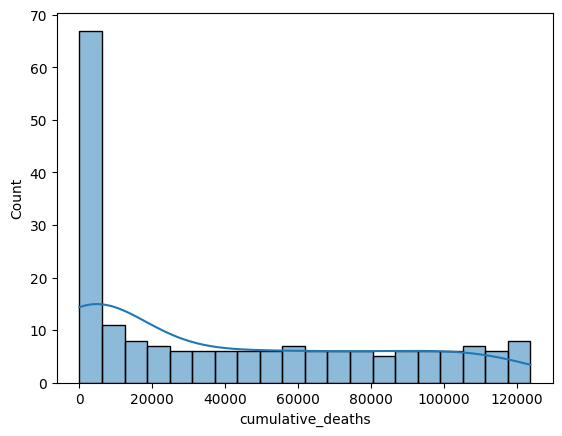

In [76]:
sns.histplot(covid_brasil, x='cumulative_deaths', bins=20, kde=True, stat='count');

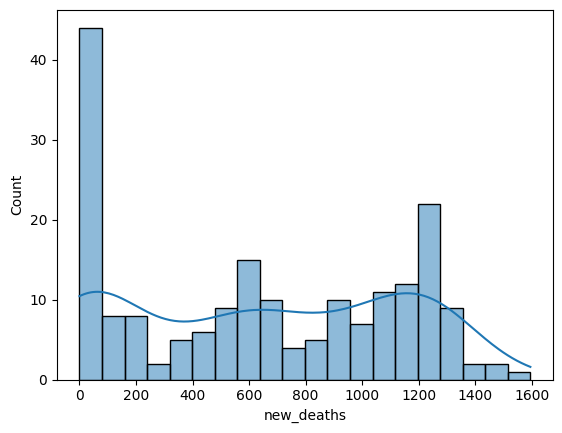

In [77]:
sns.histplot(covid_brasil, x='new_deaths', bins=20, kde=True, stat='count');

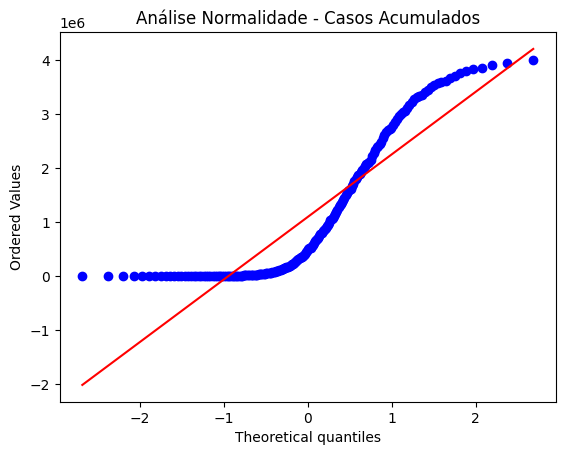

In [78]:
stats.probplot(covid_brasil['cumulative_cases'], dist='norm', plot=plt)
plt.title('Análise Normalidade - Casos Acumulados')
plt.show()

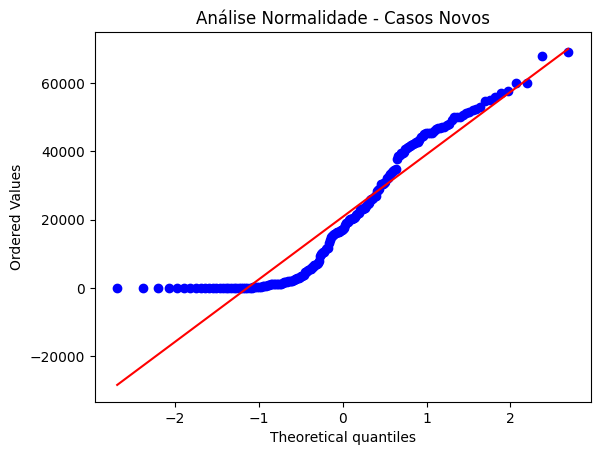

In [79]:
stats.probplot(covid_brasil['new_cases'], dist='norm', plot=plt)
plt.title('Análise Normalidade - Casos Novos')
plt.show()

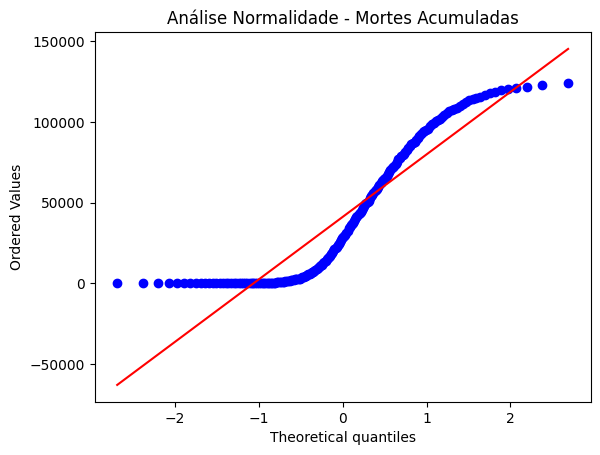

In [80]:
stats.probplot(covid_brasil['cumulative_deaths'], dist='norm', plot=plt)
plt.title('Análise Normalidade - Mortes Acumuladas')
plt.show()

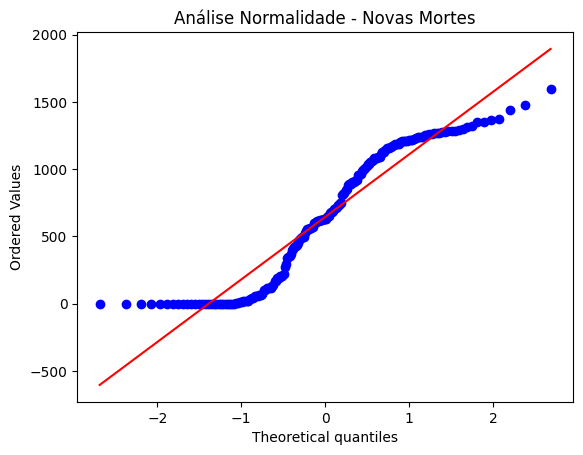

In [81]:
stats.probplot(covid_brasil['new_deaths'], dist='norm', plot=plt)
plt.title('Análise Normalidade - Novas Mortes')
plt.show()

In [82]:
stat, p = shapiro(covid_brasil['cumulative_cases'])
print('A estatística do teste é:', round(stat, 2))
print('p-valor:', p)

A estatística do teste é: 0.81
p-valor: 2.0091599415739396e-14


In [83]:
stat, p = shapiro(covid_brasil['cumulative_deaths'])
print('A estatística do teste é:', round(stat, 2))
print('p-valor:', p)

A estatística do teste é: 0.85
p-valor: 1.4815116191095573e-12


In [84]:
stat, p = shapiro(covid_brasil['new_cases'])
print('A estatística do teste é:', round(stat, 2))
print('p-valor:', p)

A estatística do teste é: 0.89
p-valor: 1.7889843146531924e-10


In [85]:
stat, p = shapiro(covid_brasil['new_deaths'])
print('A estatística do teste é:', round(stat, 2))
print('p-valor:', p)

A estatística do teste é: 0.9
p-valor: 8.78957686266827e-10


##### Dispersão

In [86]:
disp = px.scatter(x=covid_brasil.date, y=covid_brasil.cumulative_cases)
disp.update_layout(width= 900, height = 400, title_text = 'NÚMERO DE CASOS ACUMULADOS NO BRASIL')
disp.update_xaxes(title= 'DATAS')
disp.update_yaxes(title= 'CASOS')
disp.show()

In [87]:
disp = px.scatter(x=covid_brasil.date, y=covid_brasil.cumulative_deaths)
disp.update_layout(width= 900, height = 400, title_text = 'NÚMERO DE MORTES ACUMULADOS NO BRASIL')
disp.update_xaxes(title= 'DATAS')
disp.update_yaxes(title= 'MORTES')
disp.show()

In [88]:
disp = px.scatter(x=covid_brasil.date, y=covid_brasil.new_deaths)
disp.update_layout(width= 900, height = 400, title_text = 'NÚMERO DE NOVAS MORTES NO BRASIL')
disp.update_xaxes(title= 'DATAS')
disp.update_yaxes(title= 'MORTES')
disp.show()

In [89]:
disp = px.scatter(x=covid_brasil.date, y=covid_brasil.new_cases)
disp.update_layout(width= 900, height = 400, title_text = 'NÚMERO DE NOVOS CASOS NO BRASIL')
disp.update_xaxes(title= 'DATAS')
disp.update_yaxes(title= 'CASOS')
disp.show()

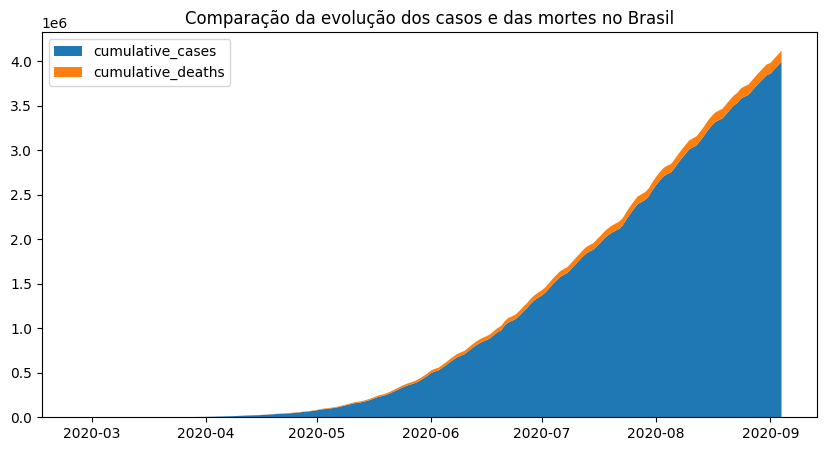

In [90]:
plt.subplots(figsize= (10,5))
plt.stackplot(covid_brasil['date'], covid_brasil['cumulative_cases'], covid_brasil['cumulative_deaths'], 
              labels= ['cumulative_cases', 'cumulative_deaths'])
plt.legend(loc='upper left')
plt.title('Comparação da evolução dos casos e das mortes no Brasil');

### Correlação Linear

In [91]:
correlacoes = covid_brasil.select_dtypes(include='number').corr(method='spearman')

In [92]:
correlacoes

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
new_cases,1.000000,0.910545,0.916165,0.910210
cumulative_cases,0.910545,1.000000,0.784347,0.999354
new_deaths,0.916165,0.784347,1.000000,0.784867
cumulative_deaths,0.910210,0.999354,0.784867,1.000000


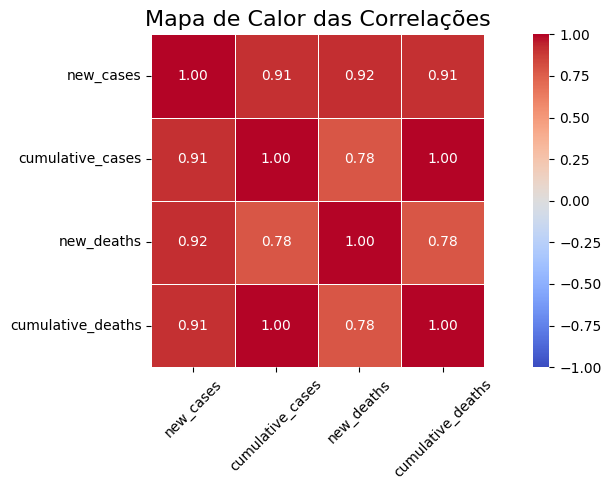

In [93]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5, square=True)
plt.title("Mapa de Calor das Correlações", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Regressão Linear Simples

In [94]:
covid_brasil.reset_index(inplace=True)
covid_brasil.drop(columns=['index'], inplace=True)

C:\Users\marco\AppData\Local\Temp\ipykernel_7904\2968573775.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
covid_brasil.head()

,date,country,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-02-26,Brazil,5,5,0,0
1,2020-02-27,Brazil,0,5,0,0
2,2020-02-28,Brazil,0,5,0,0
3,2020-02-29,Brazil,0,5,0,0
4,2020-03-01,Brazil,1,6,0,0


In [99]:
disp = px.scatter(covid_brasil, x="new_cases", y="new_deaths", size_max=10, opacity=0.6, hover_name="date", title="Relação entre Novos Casos e Novas Mortes de COVID-19 no Brasil")
disp.update_layout(width=1000, height=500, title_font_size=18, title_x=0.5, plot_bgcolor='rgba(245,245,245,1)', paper_bgcolor='rgba(255,255,255,1)')
disp.update_xaxes(title="Novos Casos", gridcolor='lightgray')
disp.update_yaxes(title="Novas Mortes", gridcolor='lightgray')
disp.show()

In [100]:
x = covid_brasil.iloc[:, 2].values
y = covid_brasil.iloc[:, 4].values

In [103]:
x = x.reshape(-1,1)

##### Dados de Treino e Testes

In [106]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.25, random_state= 2)

In [108]:
x_treinamento.size

144

In [109]:
x_teste.size

48

Criação do modelo de RL

In [116]:
regressor = LinearRegression()
regressor.fit(x_treinamento, y_treinamento)
score = regressor.score(x_treinamento, y_treinamento)

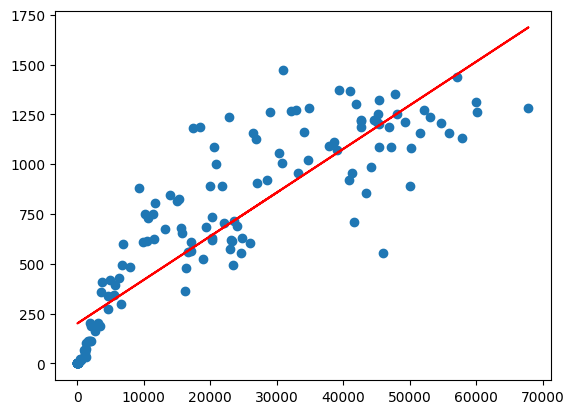

In [115]:
plt.scatter(x_treinamento,y_treinamento)
plt.plot(x_treinamento, regressor.predict(x_treinamento), color='red');

In [117]:
score

0.7706687225813502

In [118]:
previsoes = regressor.predict(x_teste)

##### Gráficos com dados de teste

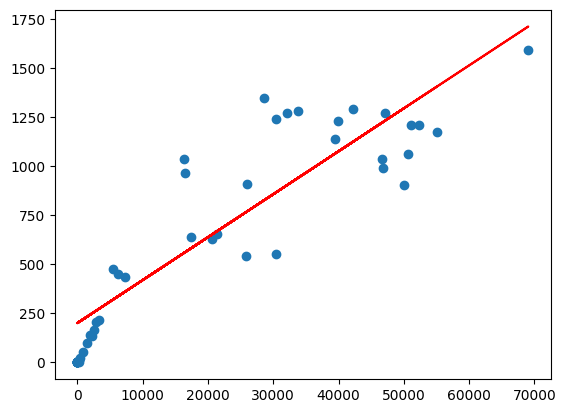

In [119]:
plt.scatter(x_teste, y_teste)
plt.plot(x_teste, regressor.predict(x_teste), color='red');

In [120]:
previsao = regressor.predict(np.array(80000).reshape(1,-1))
previsao

array([1951.4593068])

In [121]:
regressor.intercept_

np.float64(201.03943885960376)

In [122]:
regressor.coef_

array([0.02188025])

Mortes = 201,0394 + 0,0218 * Casos

### Métricas de desempenho (Regressão Linear)

In [123]:
regressor.score(x_teste, y_teste)

0.8194463380519905

In [125]:
print('Erro médio absoluto (MAE):', mean_absolute_error(y_teste, previsoes))
print('Erro quadrático Médio (MSE):', mean_squared_error(y_teste, previsoes))
print('Raiz do erro quadrático médio (RMSE):', np.sqrt(mean_squared_error(y_teste, previsoes)))

Erro médio absoluto (MAE): 192.0478857729404
Erro quadrático Médio (MSE): 49488.28727462369
Raiz do erro quadrático médio (RMSE): 222.4596306627872


### Regressão Polinomial

In [ ]:
x = covid_brasil.iloc[:,0].values

In [ ]:
x = np.arange(1, len(x)+1).reshape(-1,1)

In [ ]:
y = covid_brasil.iloc[:,3].values

In [134]:
disp = px.scatter(x=covid_brasil.date, y=covid_brasil.cumulative_cases)
disp.update_layout(width= 900, height = 400, title_text = 'NÚMERO DE CASOS ACUMULADOS NO BRASIL')
disp.update_xaxes(title= 'DATAS')
disp.update_yaxes(title= 'CASOS')
disp.show()

In [136]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y,test_size= 0.25, shuffle= True, random_state= 2)

In [137]:
x_treinamento.size

144

In [138]:
x_teste.size

48

In [139]:
y_treinamento.size

144

In [140]:
y_teste.size

48

In [141]:
poly = PolynomialFeatures(degree=2)
x_treinamento_poly = poly.fit_transform(x_treinamento)
x_teste_poly = poly.transform(x_teste)

In [143]:
regressor = LinearRegression()
regressor.fit(x_treinamento_poly, y_treinamento)
score = regressor.score(x_treinamento_poly, y_treinamento)

In [144]:
previsoes = regressor.predict(x_teste_poly)

In [145]:
forecast = np.arange(len(x)+20).reshape(-1,1)

In [146]:
forecast.shape

(212, 1)

In [147]:
x_train_total = poly.transform(forecast)
x_train_total.shape

(212, 3)

In [ ]:
x_train_total

In [149]:
previsao_total = regressor.predict(x_train_total)
len(previsao_total)

212

In [ ]:
previsao_total

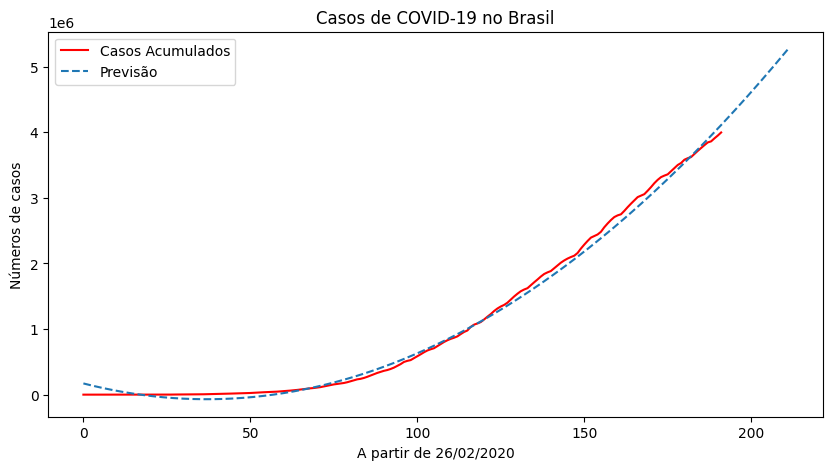

In [151]:
plt.figure(figsize = (10,5))
plt.plot(forecast[:-20], y, color='red')
plt.plot(forecast, previsao_total, linestyle = 'dashed')
plt.title('Casos de COVID-19 no Brasil')
plt.xlabel('A partir de 26/02/2020')
plt.ylabel('Números de casos')
plt.legend(['Casos Acumulados', 'Previsão']);

In [152]:
previsao_total[200]

np.float64(4613945.979958105)

##### Métricas de desempenho

In [153]:
score

0.9974077205025352

In [154]:
poly_teste_pred = regressor.predict(x_teste_poly)

In [155]:
print('Erro médio absoluto (MAE):', mean_absolute_error(poly_teste_pred, y_teste))
print('Erro quadrático Médio (MSE):', mean_squared_error(poly_teste_pred, y_teste))
print('Raiz do erro quadrático médio (RMSE):', np.sqrt(mean_squared_error(poly_teste_pred, y_teste)))

Erro médio absoluto (MAE): 56411.590189479546
Erro quadrático Médio (MSE): 4214080216.6640987
Raiz do erro quadrático médio (RMSE): 64915.94732162582
